## Finding job outcomes of recent graudate: Visualizing Based on College Majors. 

###### 1. Introduction

In this project, we're going to answer the question related to job outcomes of recent graduate resulted from different major categories. Specifically, we'll using visualization techniques to answer the questions like:

- Which major graduate makes more money? Does popular major category dominant here?
- How many majors are predominantly male? Predominantly female? Do major predominant by female makes more money compared to male or it's other way around.

For this purpose, we'll look into the survey data of job out comes of students, graduated from college between 2010 and 2012, released by [American Community Survey](https://www.census.gov/programs-surveys/acs/). But for our analysis purpose we'll use clean data from [Github repo of FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors).


**Summary of the Results**

After using visualization techniques to analyze the survey data related to job outcomes of recent graduates released by American Community Survey. We used visual graphs to answer question related to job outcomes from different Major category.

We can accross some facts about 62.5% (10 out of 16) Major category were predominantly women. Despite this fact, more earns based on Major category were predominantly Men. The highest median salary across each Major category was 57,000 which was of `Engineering`. There were five Majors with Zero Unemployment. We also found 30,000-35,000 as most common Median salary for recent graduates.


**Data**

Following is some of the columns with their descriptions that we'll use in the our analysis.

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_job`s - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.


In [50]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [4]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

There is only one missing values for the columns `Total`, `Men`, `Women` amd `ShareWomen`. As these columns have direct relation, let's see if the only missing values is in the single row.

In [5]:
recent_grads[recent_grads['Men'].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


As expected, we can see there is single row containing all the missing values related to the columns as described above. Possible way of imputing the missing values can be with their mean, median, mode or relevant values. But this is the case of single value and dropping it doesn't effect our analysis.

In case it is important to us, if possible, we should go to department or people who is repossible and ask possible way to resolve the issue. As we know this is survey data, I believe actual mistake was at the time of data entry. So, for now let's drop the column and move on with our visualization.

In [6]:
# droping the missing value row
recent_grads_clean = recent_grads.dropna(axis='index')
# data info after dropping
recent_grads_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

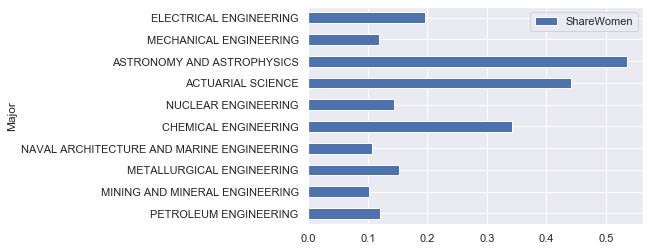

In [117]:
# looking first ten rows
recent_grads[:10].plot.barh(x='Major', y='ShareWomen')

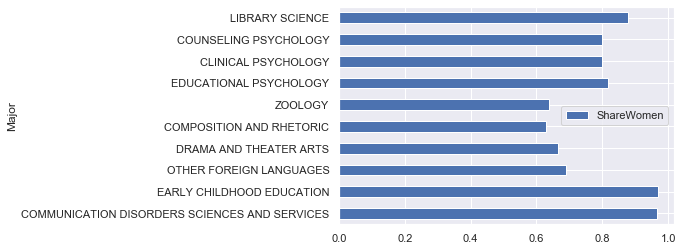

In [118]:
# looking last ten rows
recent_grads[-10:].plot.barh(x='Major', y='ShareWomen')

Now as we can see, there are no missing values. Data consists of 2 categorical column out of 21, rest are numerical. Let's see the stats of the data itself.

In [7]:
recent_grads_clean.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172,172.000000,172.000000,172.000000,172,172.000000,172.000000,172.00000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
unique,NaN,NaN,172,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,MISCELLANEOUS AGRICULTURE,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.377907,3895.953488,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,357.941860,31355.80814,...,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,619.680419,50777.42865,...,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.00000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,42.000000,3734.75000,...,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,131.000000,12031.50000,...,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,339.000000,31701.25000,...,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000


For numerical columns, we can see mean,standard deviation, min, max and quartiles(1st(25%), 2nd(50%) and third(75%)) for each of the columns. While for categorical columns, we can see number of unique, top,count and frequency. 

For example, in case of Total column, there are minmium value of 124 and maximum value of 393735 graduates in the particular majors. And first quartile(25%) shows that there are 25% data points are below 4549. Similarly, 50% below 15104 and 75% below 38909. Standard deviation shows how far is the each data points from the mean, here it is 63483.

In case of categorical column Major_category there are 1 unique categories. And Engineering is at the top with 29 count of data points. This also means there are 29 unique Major in the Engineering category.

In [21]:
#let's check the data point with minimum value of Total
recent_grads_clean[recent_grads_clean['Total'] == 124]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0


`Military Technologies` major in the `Industrail Arts & Consumer Services` has the minimum number of 124 graduates. Another interesting fact that we came across is zero number of female graduates.

In [22]:
# let's check maximum value of Total
recent_grads_clean[recent_grads_clean['Total'] == \
                  recent_grads_clean['Total'].max()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207


As we can see, Psychology major was the one with largest number of graduates where male graduates are more than twice the number of female graduates.

Let's check for Unemployed column, it also has minimum value equal to zero. This means some or one major has 100% employment rate.

In [120]:
zero_unemployment = recent_grads[recent_grads['Unemployed'] <1]
zero_unemployment.T

,52,73,83,112,120
Rank,53,74,84,113,121
Major_code,4005,3801,3602,1106,2301
Major,MATHEMATICS AND COMPUTER SCIENCE,MILITARY TECHNOLOGIES,BOTANY,SOIL SCIENCE,EDUCATIONAL ADMINISTRATION AND SUPERVISION
Total,609,124,1329,685,804
Men,500,124,626,476,280
Women,109,0,703,209,524
Major_category,Computers & Mathematics,Industrial Arts & Consumer Services,Biology & Life Science,Agriculture & Natural Resources,Education
ShareWomen,0.178982,0,0.528969,0.305109,0.651741
Sample_size,7,4,9,4,5
Employed,559,0,1010,613,703


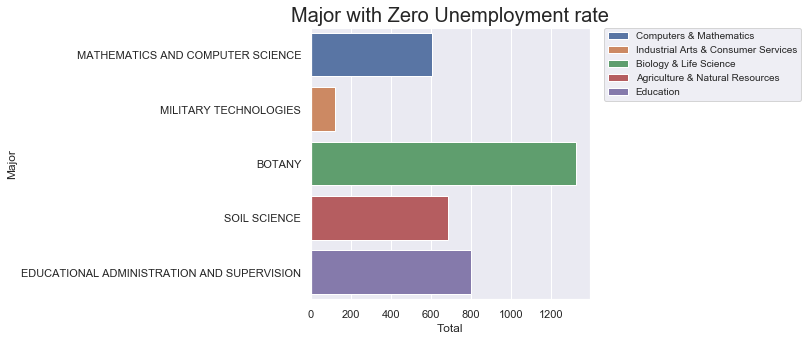

In [121]:
# setting 
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x='Total',y='Major',hue='Major_category',
            data=zero_unemployment,dodge=False)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
          fontsize=10)

plt.title('Major with Zero Unemployment rate',fontsize=20)
plt.show()

From the graph, we find there are five different Major with zero unemployment, each from different Major Category.

###### Identifying relationship between columns

We'll use scatter plot to see the relationship between different columns that are of interests to us.
Let's use the plots to explore the links:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


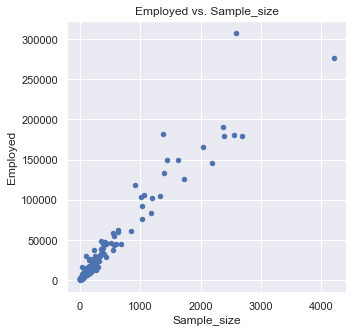

In [54]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', 
                  title='Employed vs. Sample_size',
                  figsize=(5,5))

Graph showns there is positive relationship between Employed and Sample_size. This means increase in one increases other and decrease in one results decrease in other.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


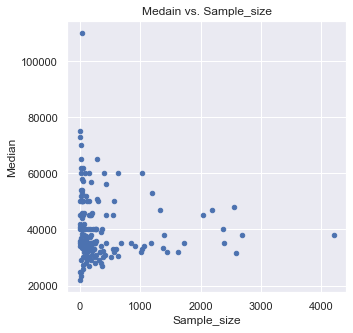

In [21]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', 
                  title='Medain vs. Sample_size',figsize=(5,5))

Above relationship between Median and Sample_size cannot be explained with linear relationship.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


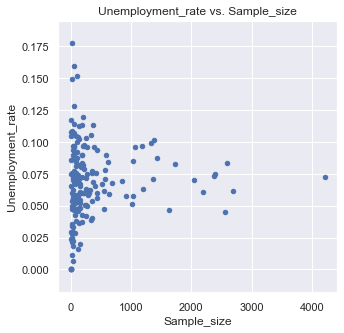

In [23]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate',
                  kind='scatter', 
                  title='Unemployment_rate vs. Sample_size', 
                  figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


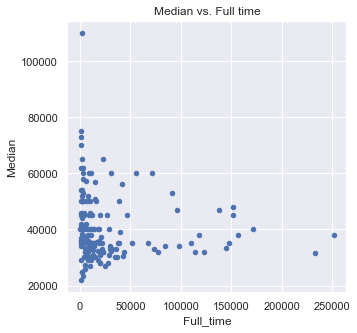

In [25]:
recent_grads.plot(x='Full_time', y='Median',
                  kind='scatter', 
                  title='Median vs. Full time', 
                  figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


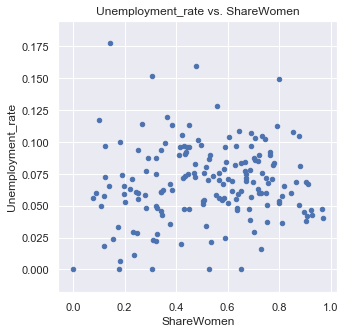

In [26]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate',
                  kind='scatter', 
                  title='Unemployment_rate vs. ShareWomen', 
                  figsize=(5,5))

Similary, here also there is no linear relationship between the two variables. Only fact we can gather here is data points are sparsed.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


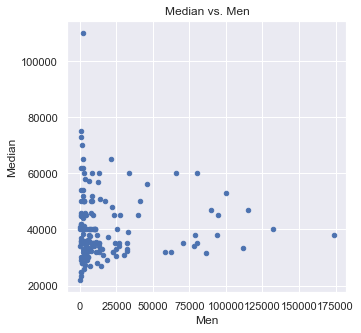

In [27]:
recent_grads.plot(x='Men', y='Median',
                  kind='scatter', 
                  title='Median vs. Men', 
                  figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


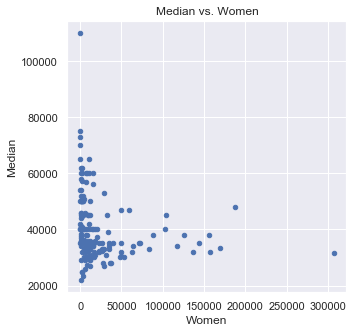

In [28]:
recent_grads.plot(x='Women', y='Median',
                  kind='scatter', 
                  title='Median vs. Women', 
                  figsize=(5,5))

Let's answer the question, `Does popular major graduate earn more money compared to othe majors?`.

For these we're going the group the data by Major category and then compare their median salary. We also have to form another group by on Major category aggregated with sum to find the most popular major category.

In [55]:
major_group = recent_grads_clean.groupby(['Major_category']).median()
major_group.sort_values('Median',ascending=False,inplace=True)
major_group.head()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major_category,,,,,,,,,,,,,,,,,,,
Engineering,17.0,2413.0,4790.0,4419.0,1385.0,0.227118,71.0,4428.0,4175.0,1040.0,3413.0,400.0,0.059824,57000.0,40000.0,67000.0,2446.0,2121.0,372.0
Computers & Mathematics,48.0,2106.0,8066.0,6607.0,2908.0,0.269194,103.0,6509.0,6289.0,1468.0,4936.0,721.0,0.090823,45000.0,30000.0,60000.0,2593.0,3244.0,357.0
Business,58.0,6206.0,25894.0,13496.0,18313.0,0.441356,278.0,20760.0,18550.0,4890.0,15446.0,2092.0,0.069749,40000.0,30000.0,55000.0,3383.0,9629.0,3046.0
Physical Sciences,74.0,5004.5,3230.5,1819.0,1627.0,0.520427,34.0,2604.5,2295.0,944.0,1878.0,118.0,0.051098,39500.0,29000.0,50000.0,1390.0,1396.0,253.0
Social Science,80.0,5504.0,19879.0,10345.0,9848.0,0.543405,214.0,16181.0,13616.0,5563.0,10548.0,1799.0,0.097244,38000.0,28000.0,50000.0,5350.0,9570.0,1905.0


In [57]:
major_total = recent_grads_clean.groupby(['Major_category']).sum()
major_total.sort_values('Total',ascending=False,inplace=True)

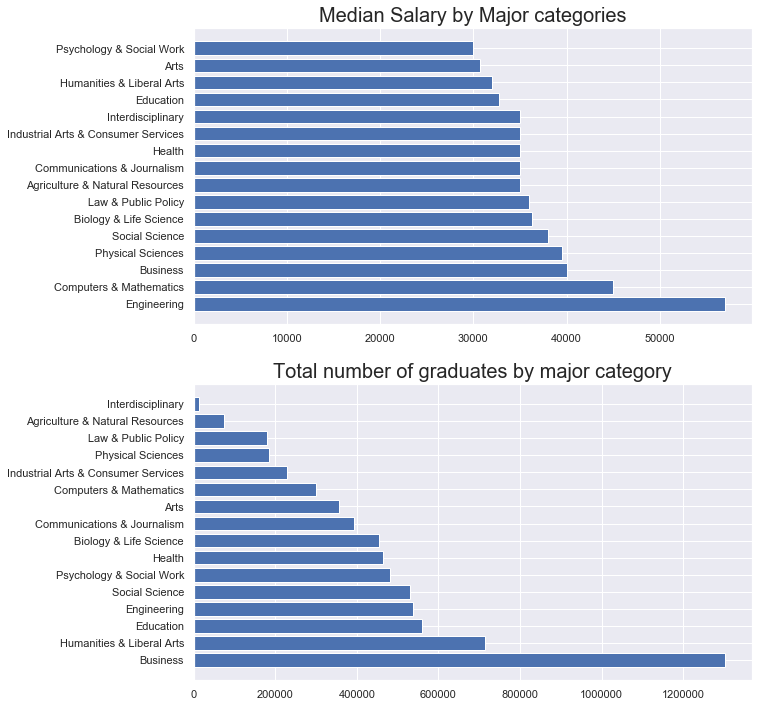

In [78]:
x = major_total.index.values
y = major_total['Total']

x1 = major_group.index.values
y1 = major_group['Median']


fig,ax = plt.subplots(2,figsize=(10,12))
ax[0].barh(x1,y1)
ax[0].set_title('Median Salary by Major categories',
               fontsize=20)

ax[1].barh(x,y)
ax[1].set_title('Total number of graduates by major category',
               fontsize=20)
plt.show()

From above two bargraph we're clear that this is not the case. Eventhough, more students have degree in business, median pay of Engineering graduate is highest compared to other majors. Business graduate median is approx. close to Physical Sciences graduates which is fourth from the last in case of popularity. 

Similary, Humanities & Liberal Arts which is second place in popularity landed on third from last in the median pay for graudate students.

Assumptions: Popularity here is defined as more number of students.

In [69]:
# check how many majors are there above median salary
major_above_median =recent_grads_clean[recent_grads_clean['Median']> 
                                   major_group['Median'].max()]

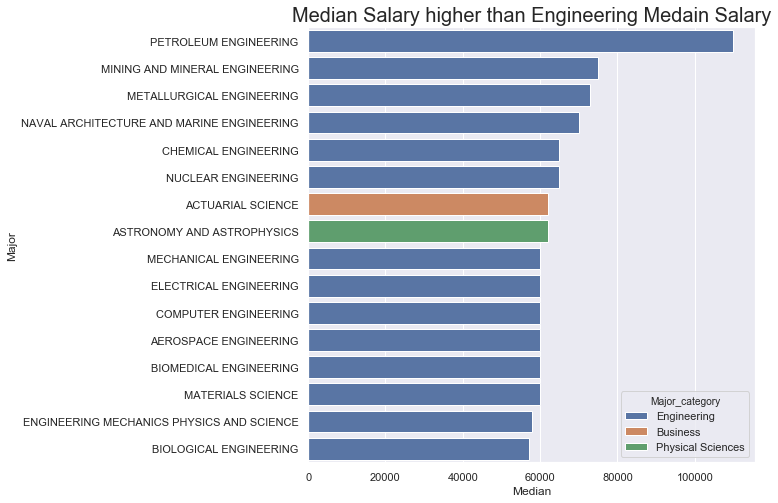

In [77]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x='Median',y='Major',hue='Major_category',
           data=major_above_median,dodge=False)

plt.title('Median Salary higher than Engineering Medain Salary',
         fontsize=20)
plt.show()

There is only two major each one from Business and Physical Science whose median salary is higher than median salary of Engineering major.

Let's answer another question about relationship between female predominant in the major and medain salary.

In [83]:
# take data where there are majority female students

# create bool masking
bool_female_greater = (major_total['Women'] > major_total['Men'])
female_greater_index =major_total[bool_female_greater].index.values

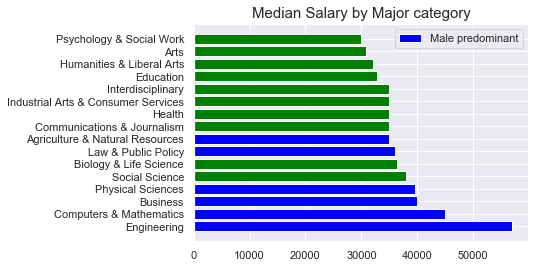

In [93]:
# legend
legends=['Male predominant']

for x in major_group.index.values:
    if x in female_greater_index:
        plt.barh(x,major_group.loc[x,'Median'],color='green')
    else:
        plt.barh(x,major_group.loc[x,'Median'],color='blue')

plt.legend(legends)
plt.title('Median Salary by Major category',
         fontsize=15)
plt.show()

Out of 16 major 10 are predominant by female. Despite this, they seem to earn less money than male predominant Major category.

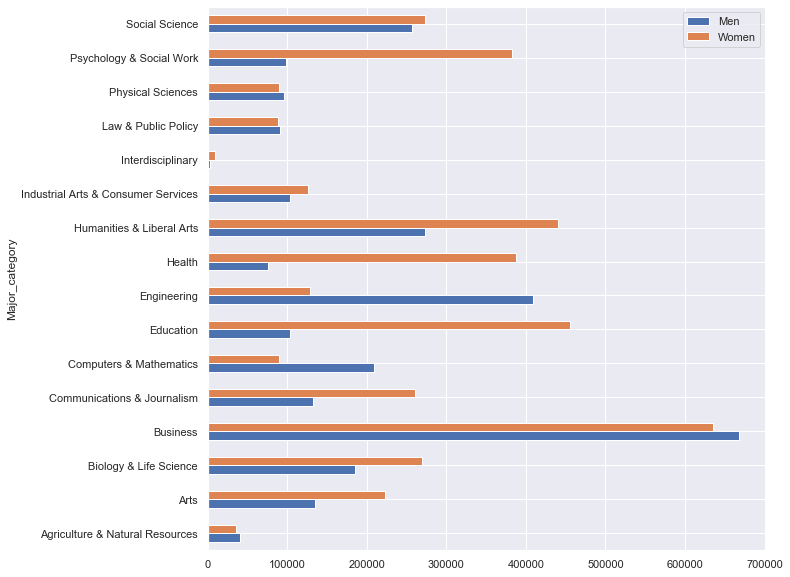

In [94]:
recent_grads_clean.pivot_table(index='Major_category',
                              values=['Men','Women'],
                              aggfunc=np.sum).plot(kind='barh',
                                              figsize=(10,10))
plt.show()

We can see, 62.5 % of major category are predominant by women.

###### Identifying the range of values

Let's try histogram to see the category of range values.

Note: In this section, all the facts are presented on basis of number of bins used. Changing bins will vary the results.

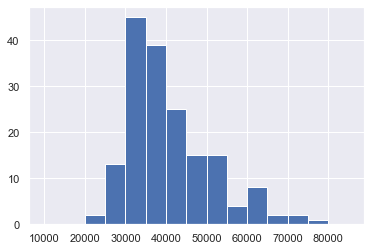

In [100]:
# bin here determines the number of intervals its divided into
recent_grads_clean['Median'].hist(bins=15, range=(10000,85000))

So, the most common median salary is between 30k-35k(30,000-35,000) with around 45 data points.

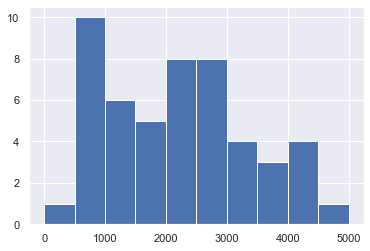

In [104]:
recent_grads_clean['Employed'].hist(bins=10, range=(0,5000))

In [105]:
bool_employed = (recent_grads_clean['Employed'] >500) & (
                recent_grads_clean['Employed'] <=1000)
len(recent_grads_clean[bool_employed])

10

There are 10 data points(Majors) whose employment number are in the range 500 to 1000 graduates. Below you see the bar graph to see those Majors.

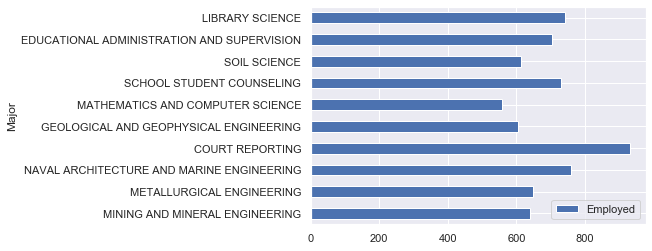

In [108]:
recent_grads_clean[bool_employed].plot.barh(x='Major',
                                       y='Employed')

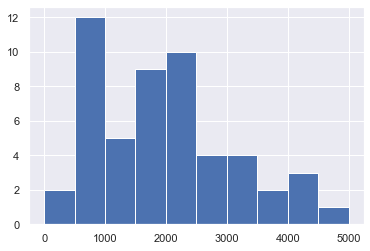

In [109]:
recent_grads_clean['Full_time'].hist(bins=10, range=(0,5000))

Here also, we can see there are 12 Majors where the Full-time graduate are in the range 500 to 1000.

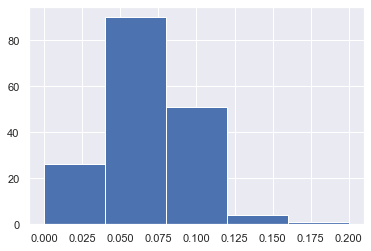

In [111]:
recent_grads_clean['Unemployment_rate'].hist(bins=5, range=(0,0.2))

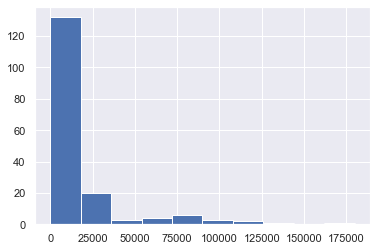

In [112]:
recent_grads_clean['Men'].hist(bins=10, range=(0,180000))

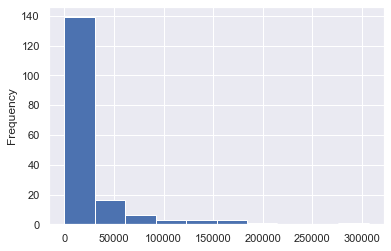

In [113]:
recent_grads_clean['Women'].plot(kind='hist')

###### Scatter Matrix Plot 

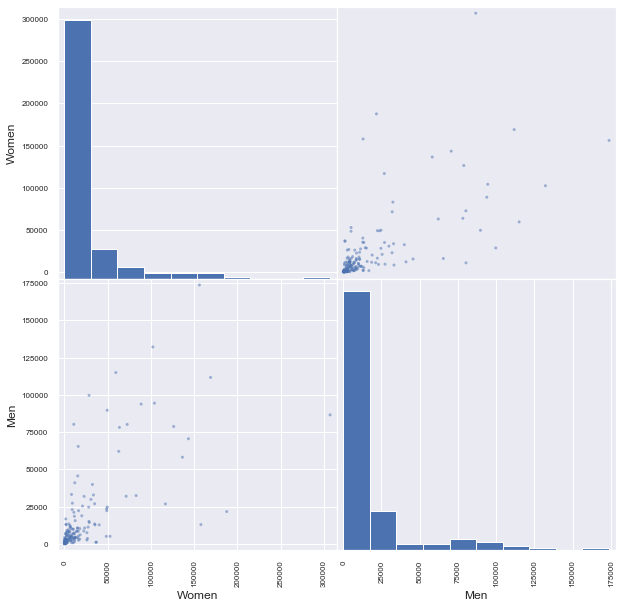

In [114]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Women', 'Men']], 
                           figsize=(10,10))

plt.show()

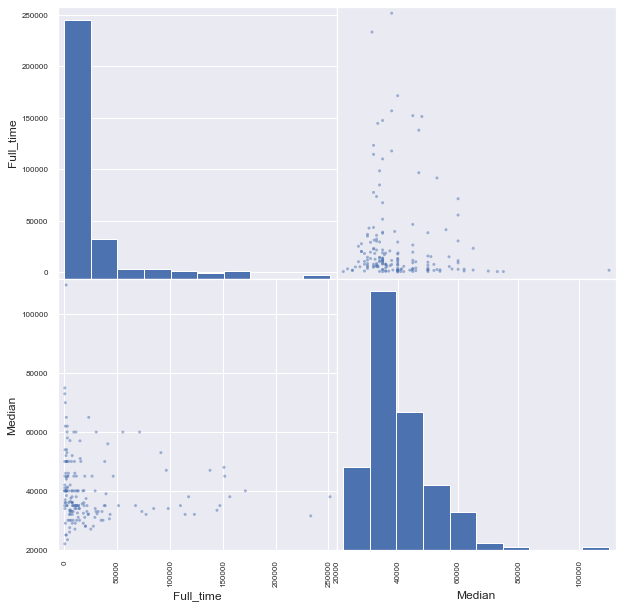

In [119]:
scatter_matrix(recent_grads[['Full_time', 'Median']],
               figsize=(10,10))
plt.show()

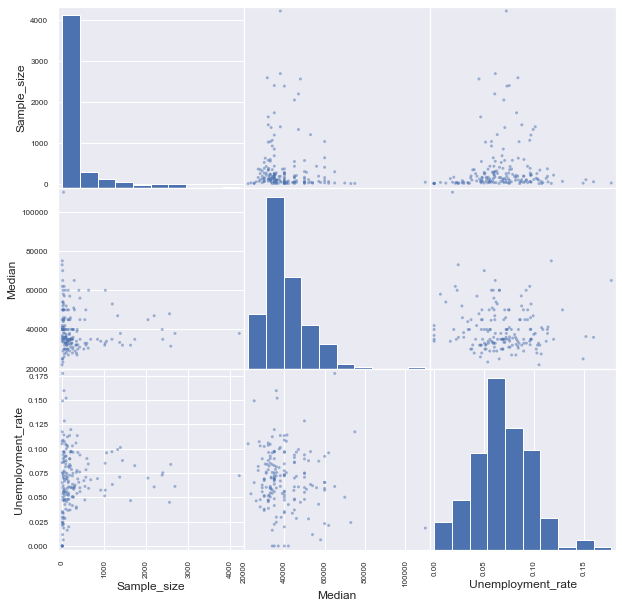

In [116]:
scatter_matrix(recent_grads[['Sample_size', 'Median',
                             'Unemployment_rate']],figsize=(10,10))
plt.show()

**Conclusion**:

In this project, we used visualization techniques to analyze the survey data related to job outcomes of recent graduates released by American Community Survey. We used visual graphs to answer question related to job outcomes from different Major category.

We can accross some facts about 62.5% (10 out of 16) Major category were predominantly women. Despite this fact, more earns based on Major category were predominantly Men. The most highest median salary across each Major category was 57,000 which was of Engineering. There were five Majors with Zero Unemployment. We also found 30,000-35,000 as most common Median salary for recent graduates.

Continuation:

- Using a box plot to explore the distributions of median salaries and unemployment rate.
- Using a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.